In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('spooky_author.csv', encoding = 'utf-8')

In [3]:
train.head()

# EAP = Edgar Allen Poe, HPL = HP Lovecraft, MWS = Mary Shelley

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
# id dropped for now

train.drop('id', axis=1, inplace=True)

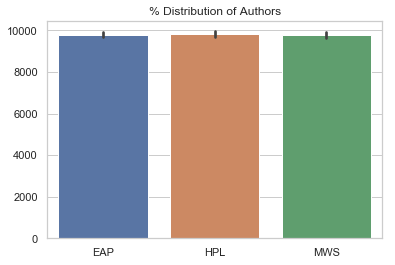

In [5]:
# take a look at the distribution of authors

sns.set(style="whitegrid")

ax = sns.barplot(x = train['author'].values, y = train['text'].index)

# setting title 
ax.set_title("% Distribution of Authors")

plt.show()

In [6]:
# remove punctuation and lowercase

punctuation = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]

def process_text(msg):    
    msg = [msg.lower() for msg in msg if msg not in punctuation]
    msg =''.join(msg)
    return [msg for msg in msg.split()]

In [7]:
X = train["text"]
y = train["author"]

In [8]:
# initialize TF-IDF to vectorize text

vectorizer = TfidfVectorizer(analyzer=process_text).fit(X)

In [9]:
print(len(vectorizer.vocabulary_))
X = vectorizer.transform(X)

25411


In [10]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
# let's try to use a support vector machine classifier

clf = svm.SVC(C=500, gamma='scale')
clf.fit(X_train, y_train)

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# fit and predict

predict = clf.predict(X_test)

In [13]:
# Model Accuracy: What is our test accuracy?

print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.8281409601634321


In [14]:
# confusion matrix to evaluate model

print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[1344   86  100]
 [ 185  905   54]
 [ 188   60  994]]


              precision    recall  f1-score   support

         EAP       0.78      0.88      0.83      1530
         HPL       0.86      0.79      0.82      1144
         MWS       0.87      0.80      0.83      1242

   micro avg       0.83      0.83      0.83      3916
   macro avg       0.84      0.82      0.83      3916
weighted avg       0.83      0.83      0.83      3916



In [15]:
# test prediction for individual lines taken arbitarily for the internet aka. google

def predict_lines(x):
    x = vectorizer.transform(x)
    predict = clf.predict(x)
    print(predict)

In [16]:
# Answer should be Mary Shelley
predict_lines(['Beware; for I am fearless, and therefore powerful'])

['MWS']


In [17]:
# Answer should be Mary Shelley
predict_lines(['I am alone and miserable. Only someone as ugly as I am could love me'])

['MWS']


In [18]:
# Answer should be Edgar Allen Poe
predict_lines(['I became insane, with long intervals of horrible sanity'])

['HPL']


In [19]:
# Answer should be Edgar Allen Poe
predict_lines(['Words have no power to impress the mind without the exquisite horror of their reality'])

['EAP']


In [20]:
# Answer should be HP Lovecraft
predict_lines(['The oldest and strongest emotion of mankind is fear, and the oldest and strongest kind of fear is fear of the unknown'])

['HPL']


In [21]:
# Answer should be HP Lovecraft
predict_lines(['From even the greatest of horrors irony is seldom absent'])

['HPL']
